In [146]:
# Machine Learning for DA, Assignment 2
# Names: Jianyu He, Chenxi Zhang
# Student number: D17124591, C16434996
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing


# Import the dataset
df = pd.read_csv('./dataset/trainingset.csv', header=None)
# Headers of the dataset
df.columns = ['id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'target']

# Dropping the id column because is unnecssary for building a classifier
df = df.drop(columns=['id'])

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,59,JobCat11,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,41,JobCat9,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
2,55,JobCat7,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,56,JobCat6,married,tertiary,no,830,yes,yes,unknown,6,may,1,-1,0,unknown,yes
4,60,JobCat2,divorced,secondary,no,545,yes,no,unknown,6,may,1,-1,0,unknown,yes


In [147]:
# 1. Data Exploration

# Check the datatypes of the dataframe, get all the categorical/binary features and plot a exploration histogram
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
campaign      int64
pdays         int64
previous      int64
poutcome     object
target       object
dtype: object

In [148]:
# Count the data to check for missing values
df.count()

age          24300
job          24300
marital      24300
education    24300
default      24300
balance      24300
housing      24300
loan         24300
contact      24300
day          24300
month        24300
campaign     24300
pdays        24300
previous     24300
poutcome     24300
target       24300
dtype: int64

Text(0, 0.5, 'Frequency')

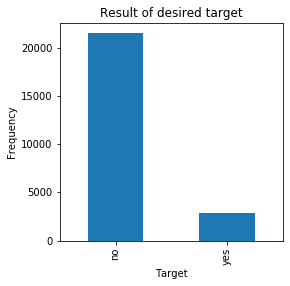

In [149]:
# Frquency of the target feature plotted in histogram
plot = df['target'].value_counts(sort=True, ascending=False).plot(kind='bar', figsize=(4,4), title='Result of desired target')
plot.set_xlabel('Target')
plot.set_ylabel('Frequency')

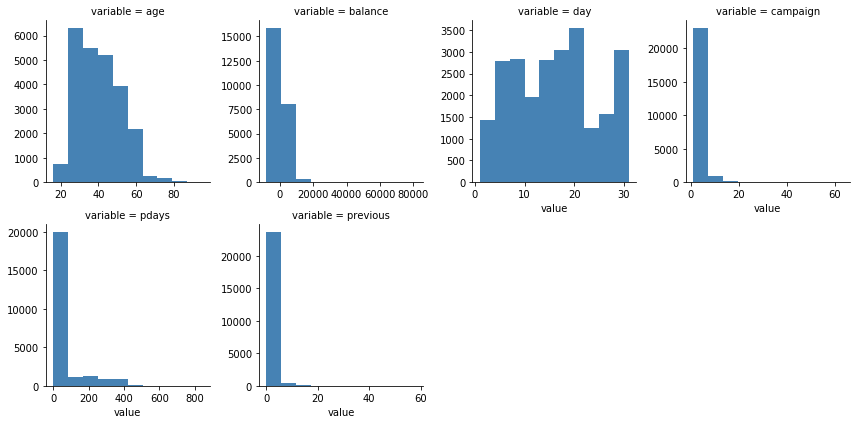

In [150]:
quan = list(df.loc[:, df.dtypes != 'object'].columns.values)
grid = sns.FacetGrid(pd.melt(df, value_vars=quan),
                     col='variable', col_wrap=4, height=3, aspect=1,
                     sharex=False, sharey=False)
grid.map(plt.hist, 'value', color="steelblue")
plt.show()

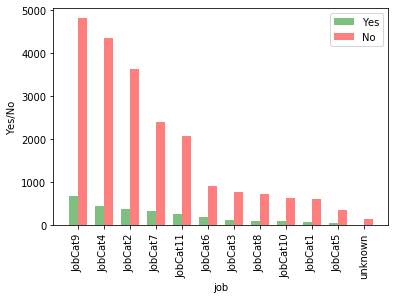

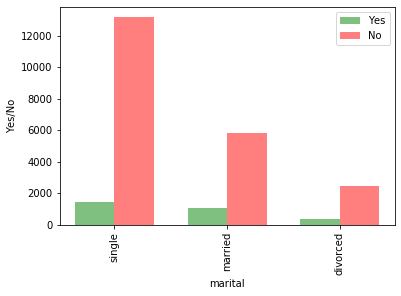

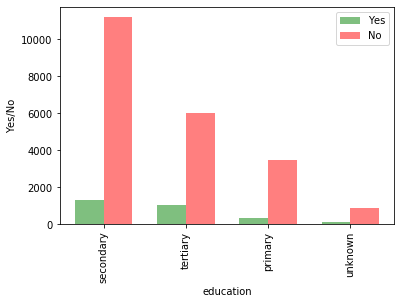

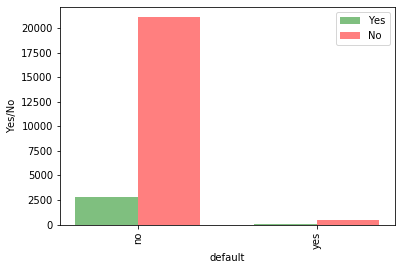

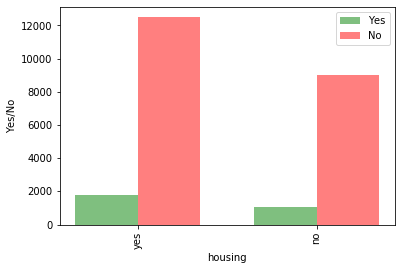

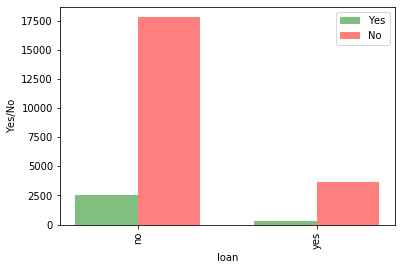

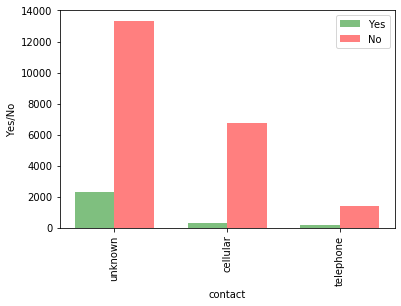

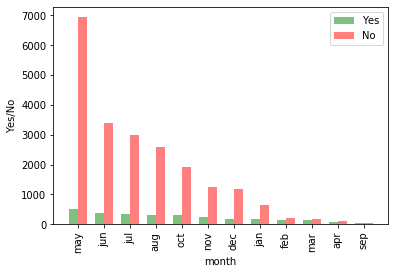

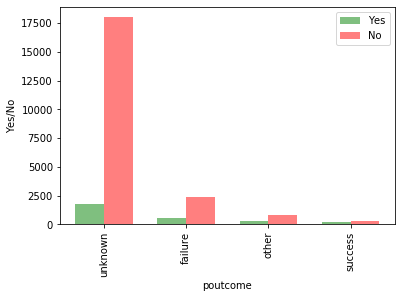

In [151]:
# Column headers for plotting
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

tyes = df[df['target'] == 'yes']
tno = df[df['target'] == 'no']
for c in cat_columns:
    x = np.arange(len(tno[c].unique()))
    bar_width = 0.35
    y = tyes[c].value_counts(sort=True, ascending=False)
    y1 = tno[c].value_counts(sort=True, ascending=False)
    plt.bar(x, y, bar_width, align="center", color="g", label="Yes", alpha=0.5)
    plt.bar(x+bar_width, y1, bar_width, color="r", align="center", label="No", alpha=0.5)

    plt.xlabel(c)
    plt.ylabel('Yes/No')
    plt.xticks(x+bar_width/2, tno[c].unique(),rotation=90)
    plt.legend()
    plt.show()

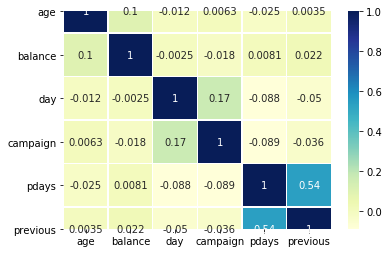

In [152]:
# plot correlation matrix
sns.heatmap(df._get_numeric_data().astype(float).corr(), 
        xticklabels=True,
        yticklabels=True, linewidth=0.5,annot=True, cmap='YlGnBu' )

In [153]:
df.corr(method='pearson').iloc[0].sort_values(ascending=False)

age         1.000000
balance     0.100310
campaign    0.006287
previous    0.003513
day        -0.012287
pdays      -0.024840
Name: age, dtype: float64

In [154]:

# # # Take all the object dtypes (descriptive features) from the dataframe
# con_df = df.select_dtypes(exclude=['object']).copy()

# cat_df = df.select_dtypes(include=['object']).copy()
# # Drop out the target feature
# cat_df = cat_df.drop(columns=['target'])

# Use get dummies to hot encode the categorical features

# # Use LabelEncoder to encode categorical columns to integers
# le = preprocessing.LabelEncoder()
# cat_df_transformed = cat_df.astype(str).apply(le.fit_transform)

# # Show updated record
# new_df = df.copy()
# new_df.update(cat_df_transformed)

# Merge with the continueous features

df = pd.get_dummies(df, columns=cat_columns, drop_first=True)

In [176]:
from sklearn.model_selection import train_test_split

X = df.copy()
X = X.drop(columns=['target'])
Y = df['target']

# split data to 80% trian 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)




In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


# KNN
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
    .format(knn.score(X_train, Y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
    .format(knn.score(X_test, Y_test)))

kf = KFold(n_splits=10)

cv_res = cross_val_score(knn, X_train, Y_train, cv=kf)

test_res = cross_val_score(knn, X_test, Y_test, cv=kf)

# Using CV k-fold 10 to get the accuracy score
# Cross_Val knn score:  [0.8755144  0.85802469 0.8755144  0.86522634 0.86779835 0.86059671
# 0.85493827 0.85751029 0.86522634 0.875     ]
# Turns out we don't have enough data, losing accuracy
print('Cross_Val knn score: ', np.mean(cv_res))
print('Cross_Val knn test score: ', np.mean(test_res))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.88
Cross_Val knn score:  0.8627057613168724
Cross_Val knn test score:  0.8736625514403291


In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)
    
# Print out the accuracy for the depth 1-5
accuracy

In [178]:
# DT, using 2 because the 
dt = DecisionTreeClassifier(max_depth=7)

dt.fit(X_train, Y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
    .format(dt.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
    .format(dt.score(X_test, Y_test)))

kf = KFold(n_splits=10)
cv_res = cross_val_score(dt, X_train, Y_train, cv=kf)
print('Cross_Val DT score: ', np.mean(cv_res))
test_res = cross_val_score(dt, X_train, Y_train, cv=kf)
print('Cross_Val DT test score: ', np.mean(test_res))



Accuracy of Decision Tree classifier on training set: 0.90
Accuracy of Decision Tree classifier on training set: 0.90
Cross_Val DT score:  0.8939300411522634
Cross_Val DT test score:  0.8938271604938273


'no'

In [ ]:
# naive bayes
nb = GaussianNB()
nb.fit(X_train, Y_train)
print('Accuracy of NB classifier on training set: {:.2f}'
    .format(nb.score(X_train, Y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
    .format(nb.score(X_test, Y_test)))

kf = KFold(n_splits=10)
# CV scores for naive bayes
cv_res = cross_val_score(nb, X_train, Y_train, cv=kf)
print('Cross_Val NB score: ', np.mean(cv_res))
test_res = cross_val_score(nb, X_train, Y_train, cv=kf)
print('Cross_Val NB test score: ', np.mean(test_res))

In [17]:
# logistic regression
lr = LogisticRegression(solver='liblinear')

lr.fit(X_train, Y_train)

# Train test split scores
print('Accuracy of LR classifier on training set: {:.2f}'
    .format(lr.score(X_train, Y_train)))
print('Accuracy of LR classifier on test set: {:.2f}'
    .format(lr.score(X_test, Y_test)))

# K-fold = 10
kf = KFold(n_splits=10)

# Cross Validation scores
cv_res = cross_val_score(lr, X_train, Y_train, cv=kf)
print('Cross_Val DT score: ', np.mean(cv_res))
test_res = cross_val_score(lr, X_train, Y_train, cv=kf)
print('Cross_Val DT test score: ', np.mean(test_res))

Accuracy of LR classifier on training set: 0.89
Accuracy of LR classifier on test set: 0.90
Cross_Val DT score:  0.8930555555555555
Cross_Val DT test score:  0.8930555555555555


In [170]:
from sklearn.metrics import confusion_matrix
import pylab as pl

pred = .predict(X_test)

print(confusion_matrix(Y_test, pred))

cm = confusion_matrix(Y_test, pred)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

SyntaxError: invalid syntax (<ipython-input-170-cecb11f1ea70>, line 4)

In [180]:
query = pd.read_csv('./dataset/queries.csv', header=None)
query.columns = ['id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'target']
query = pd.get_dummies(query, columns=cat_columns, drop_first=True)
query = query.drop(columns=['id'])
query = query.drop(columns=['target'])
pred = dt.predict(query)
pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [216]:
results = pd.read_csv('./dataset/queries.csv', header=None)
results.columns = ['id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'target']
for i in range(len(pred)):
    results.target[i] = pred[i]
    
results = results.drop(columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome'])
np.savetxt(r'./dataset/results.txt', (results) , fmt='%s', delimiter=',')
results['target'].value_counts()

c:\users\1\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


no     2623
yes      77
Name: target, dtype: int64